# Машинное обучение, ВМК МГУ

## Практическое задание 1. Метод опорных векторов и аппроксимация ядер

### Общая информация
Дата выдачи: 23:59 MSK 05.03.2021

Мягкий дедлайн: 23:59MSK 19.03.2021 **(за каждый день просрочки снимается 1 балл)**

Жесткий дедлайн: 23:59MSK 26.03.2021

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимальная оценка за работу (без учёта бонусов) — **10 баллов.**

Сдавать задание после указанного жёсткого срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
   * Ноутбук homework-practice-01-random-features-Username.ipynb

Username — ваша фамилия и имя на латинице именно в таком порядке

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    

### О задании

На занятиях мы подробно обсуждали метод опорных векторов (SVM). В базовой версии в нём нет чего-то особенного — мы всего лишь используем специальную функцию потерь, которая не требует устремлять отступы к бесконечности; ей достаточно, чтобы отступы были не меньше +1. Затем мы узнали, что SVM можно переписать в двойственном виде, который, позволяет заменить скалярные произведения объектов на ядра. Это будет соответствовать построению модели в новом пространстве более высокой размерности, координаты которого представляют собой нелинейные модификации исходных признаков.

Ядровой SVM, к сожалению, довольно затратен по памяти (нужно хранить матрицу Грама размера $d \times d$) и по времени (нужно решать задачу условной оптимизации с квадратичной функцией, а это не очень быстро). Мы обсуждали, что есть способы посчитать новые признаки $\tilde \varphi(x)$ на основе исходных так, что скалярные произведения этих новых $\langle \tilde \varphi(x), \tilde \varphi(z) \rangle$ приближают ядро $K(x, z)$.

Мы будем исследовать аппроксимации методом Random Fourier Features (RFF, также в литературе встречается название Random Kitchen Sinks) для гауссовых ядер. Будем использовать формулы, которые немного отличаются от того, что было на лекциях (мы добавим сдвиги внутрь тригонометрических функций и будем использовать только косинусы, потому что с нужным сдвигом косинус превратится в синус):
$$\tilde \varphi(x) = (
\cos (w_1^T x + b_1),
\dots,
\cos (w_n^T x + b_n)
),$$
где $w_j \sim \mathcal{N}(0, 1/\sigma^2)$, $b_j \sim U[-\pi, \pi]$.

На новых признаках $\tilde \varphi(x)$ мы будем строить любую линейную модель.

Можно считать, что это некоторая новая парадигма построения сложных моделей. Можно направленно искать сложные нелинейные закономерности в данных с помощью градиентного бустинга или нейронных сетей, а можно просто нагенерировать большое количество случайных нелинейных признаков и надеяться, что быстрая и простая модель (то есть линейная) сможет показать на них хорошее качество. В этом задании мы изучим, насколько работоспособна такая идея.

### Алгоритм

Вам потребуется реализовать следующий алгоритм:
1. Понизить размерность выборки до new_dim с помощью метода главных компонент.

2. Для полученной выборки оценить гиперпараметр $\sigma^2$ с помощью эвристики (рекомендуем считать медиану не по всем парам объектов, а по случайному подмножеству из где-то миллиона пар объектов): $$\sigma^2 = \text{median}_{i, j = 1, \dots, \ell, i \neq j} \left\{\sum_{k = 1}^{d} (x_{ik} - x_{jk})^2 \right\}$$
**Замечание:** обратите внимание на  $i \neq j$, без этого оценка медианы может быть смещена, а также без этого будут сниматься баллы.

3. Сгенерировать n_features наборов весов $w_j$ и сдвигов $b_j$.

4. Сформировать n_features новых признаков по формулам, приведённым выше.

5. Обучить линейную модель (логистическую регрессию или SVM) на новых признаках.

6. Повторить преобразования (PCA, формирование новых признаков) к тестовой выборке и применить модель.

Тестировать алгоритм мы будем на данных Fashion MNIST. Ниже код для их загрузки и подготовки.

In [1]:
# Attention! Кажется, под python3.9 импортнуть керас будет трудно (стабильный тензорфлоу requires Python 3.5–3.8, pip and venv >= 19.0)
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
(x_train_pics, y_train), (x_test_pics, y_test) = fashion_mnist.load_data()
x_train = x_train_pics.reshape(x_train_pics.shape[0], -1)
x_test = x_test_pics.reshape(x_test_pics.shape[0], -1)

**ВАЖНОЕ ЗАМЕЧАНИЕ:**

Датасет по умолчанию хранится в типе 'uint8', вследствие чего при ручном подсчете дисперсии переменные переполняются и вы получаете неадекватные результаты. Бороться с этим можно преобразованием исходных данных к типу 'float'. Еще один хороший вариант &ndash; использовать специализированные функции из библиотек numpy / scipy и, в частности, **scipy.spatial.distance_matrix**.

Ниже приводим подтверждающий пример.

In [2]:
import numpy as np

indices = np.random.choice(x_train.shape[0], size=2000)
print(np.median(np.sum((x_train[indices[:1000]].astype(np.float_) - x_train[indices[1000:]]).astype(np.float_) ** 2, axis=1)))

print(np.median(np.sum((x_train[indices[:1000]] - x_train[indices[1000:]]) ** 2, axis=1)))

8347573.5
54012.0


__Задание 1. (5 баллов)__

**А) (4 балла)** Реализуйте алгоритм, описанный выше. Можете воспользоваться шаблоном класса ниже или написать свой интерфейс.

Ваша реализация должна поддерживать следующие опции:
1. Возможность задавать значения параметров new_dim (по умолчанию 50) и n_features (по умолчанию 1000).
2. Возможность включать или выключать предварительное понижение размерности с помощью метода главных компонент.
3. Возможность выбирать тип линейной модели (логистическая регрессия или SVM с линейным ядром).


**Важно! За несоответствия будут сниматься баллы:**
* Так как мы работаем с линейными моделями, вам необходимо делать нормализацию данных.
* Оценка гиперпраметра распределения и построение нового датасета должны быть без питоновских циклов (можно все запрограммировать векторно, используя numpy)

**Б) (1 балл)** Протестируйте на данных Fashion MNIST, сформированных кодом выше. Если на тесте у вас получилась доля верных ответов **не ниже 0.84 с параметрами по умолчанию**, то вы всё сделали правильно.

**Подсказка**
* Использование метода без PCA и без нормализации признаков перед генерацией весов может дать неожиданные результаты. Сами подумайте, почему так может происходить :)

In [3]:
import time
from sklearn import linear_model, svm, decomposition, preprocessing, pipeline, model_selection
from sklearn.base import BaseEstimator, TransformerMixin


def choose_pairs(n, size=1_000_000):
    pairs = np.empty((2, size), dtype=np.int_)
    matches = np.s_[:]
    while True:
        # технически, это не "без питоновских циклов"
        # но этот цикл за 2-3 итерации завершается для Fashion MNIST
        pairs[:, matches] = np.random.choice(n, size=(2, size))
        matches = pairs[0] == pairs[1]
        size = matches.sum()
        if not size:
            return pairs


common_kwargs = {'max_iter': 10_000, 'C': 0.01, 'verbose': 0}
    

class RFFPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, n_features=1000, new_dim=50, use_PCA=True, classifier='logreg', sample_fun=None, reduce_fun=None, **kwargs):
        """        
        Implements pipeline, which consists of PCA decomposition,
        Random Fourier Features approximation and linear classification model.
        
        n_features, int: amount of synthetic random features generated with RFF approximation.

        new_dim, int: PCA output size.
        
        use_PCA, bool: whether to include PCA preprocessing.
        
        classifier, string: either 'svm' or 'logreg', a linear classification model to use on top of pipeline.
        
        Feel free to edit this template for your preferences.    
        """
        for k, v in common_kwargs.items():
            kwargs.setdefault(k, v)

        self.n_features = n_features
        self.sample_fun = sample_fun
        self.reduce_fun = reduce_fun
        self.PCA = decomposition.PCA(n_components=new_dim) if use_PCA else None
        self.preprocess = preprocessing.StandardScaler()
        self.classifier = {
            'svm': svm.LinearSVC(**kwargs),
            'logreg': linear_model.LogisticRegression(**kwargs, solver='saga'),
        }[classifier]
        self.verbose = 1 + kwargs['verbose']

    def _fit_preprocessing(self, X):
        print_ = print if self.verbose else lambda *a, **kw: None

        # fit PCA
        if self.PCA is not None:
            start = time.time()
            X = self.PCA.fit_transform(X)
            print_(f"Fitting PCA done in {time.time() - start:.2f}s")
        else:
            X = X.astype(np.float_)

        # fit w and b
        start = time.time()
        pairs = choose_pairs(X.shape[0])
        diffs = X[pairs[0]] - X[pairs[1]]
        stddev = np.sqrt(np.median(
            (diffs * diffs).sum(axis=-1)
        ))
        if self.sample_fun is None:
            self.w = np.random.randn(X.shape[1], self.n_features) / stddev
            self.b = 2 * np.pi * np.random.rand(self.n_features) - np.pi
        else:
            w_samples = self.sample_fun(X.shape[1], (1 + self.n_features)//2) / stddev
            # Simulate sin + cos weights
            # (in case of odd number of features just throw out the sin feature)
            self.w = np.concatenate([w_samples, w_samples], axis=-1)[:, :self.n_features]
            b_samples = np.zeros((1 + self.n_features)//2)
            self.b = np.concatenate([b_samples - np.pi/2, b_samples], axis=-1)[:self.n_features]

        # transform using w and b
        if self.reduce_fun is None:
            X = np.cos(X @ self.w + self.b)
        else:
            X = self.reduce_fun(X, self.w, self.b)
        print_(f"Fitting RFF done in {time.time() - start:.2f}s")

        # fit preprocessing
        start = time.time()
        X = self.preprocess.fit_transform(X)
        print_(f"Fitting StandardScaler done in {time.time() - start:.2f}s")
        
        return X

    def fit(self, X, y):
        """
        Fit all parts of algorithm (PCA, RFF, Classification) to training set.
        """
        assert X.ndim == 2 and y.ndim == 1 and X.shape[0] == y.shape[0]
        print_ = print if self.verbose else lambda *a, **kw: None

        X = self._fit_preprocessing(X)
        
        # fit classifier
        start = time.time()
        self.classifier = self.classifier.fit(X, y)
        print_(f"Fitting Classifier done in {time.time() - start:.2f}s")

        return self

    def _transform(self, X):
        assert X.ndim == 2
        print_ = print if self.verbose else lambda *a, **kw: None

        # transform using PCA
        if self.PCA is not None:
            start = time.time()
            X = self.PCA.transform(X)
            print_(f"Transforming PCA done in {time.time() - start:.2f}s")
        else:
            X = X.astype(np.float_)
        
        # transform using w and b
        start = time.time()
        if self.reduce_fun is None:
            X = np.cos(X @ self.w + self.b)
        else:
            X = self.reduce_fun(X, self.w, self.b)
        print_(f"Transforming RFF done in {time.time() - start:.2f}s")

        # transform using StandardScaler
        start = time.time()
        X = self.preprocess.transform(X)
        print_(f"Transforming StandardScaler done in {time.time() - start:.2f}s")
        
        return X

    def _predict(self, X, need_proba=False):
        print_ = print if self.verbose else lambda *a, **kw: None
        X = self._transform(X)
        
        start = time.time()
        if need_proba:
            y = self.classifier.predict_proba(X)
        else:
            y = self.classifier.predict(X)
        print_(f"Evaluating classifier done in {time.time() - start:.2f}s")

        return y
    
    def predict_proba(self, X):
        """
        Apply pipeline to obtain scores for input data.
        """
        return self._predict(X, need_proba=True)
        
    def predict(self, X):
        """
        Apply pipeline to obtain discrete predictions for input data.
        """
        return self._predict(X, need_proba=False)

In [4]:
x_train_small, _, y_train_small, _ = model_selection.train_test_split(
    x_train, y_train,
    train_size=10_000, random_state=42,
    shuffle=True, stratify=y_train,
)

In [5]:
train_time = {}
eval_time = {}
eval_error = {}
train_eval_time = {}
train_eval_error = {}

In [6]:
def timed_train_eval(name, est):
    start = time.time()
    est = est.fit(x_train_small, y_train_small)
    train_time[name] = time.time() - start

    start = time.time()
    eval_error[name] = 1 - (y_test == est.predict(x_test)).mean()
    eval_time[name] = time.time() - start
    
    start = time.time()
    train_eval_error[name] = 1 - (y_train == est.predict(x_train)).mean()
    train_eval_time[name] = time.time() - start

In [7]:
timed_train_eval(
    'Random Fourier Features + Logistic Regression',
    RFFPipeline()
)

Fitting PCA done in 7.97s
Fitting RFF done in 0.70s
Fitting StandardScaler done in 0.11s
Fitting Classifier done in 189.29s
Transforming PCA done in 0.22s
Transforming RFF done in 0.41s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.10s
Transforming PCA done in 1.31s
Transforming RFF done in 2.45s
Transforming StandardScaler done in 0.18s
Evaluating classifier done in 0.61s


In [8]:
print(f"Test error: {eval_error['Random Fourier Features + Logistic Regression']:.2%} (accuracy={1-eval_error['Random Fourier Features + Logistic Regression']:.2%}).")

Test error: 14.74% (accuracy=85.26%).


__Задание 2. (3 балла)__

_Сравните следующие подходы: **(2.5 балла)**_

* Подход со случайными признаками vs обучение линейного SVM на исходных признаках.
* Подход со случайными признаками vs обучение ядрового SVM на исходных признаках.
* Подход со случайными признаками vs вариант, в котором вы понижаете размерность с помощью PCA и обучаете градиентный бустинг. Используйте одну из реализаций CatBoost/LightGBM/XGBoost
 * Не забудьте в этом случае подобрать число деревьев и длину шага.

_Сделайте выводы: **(0.5 баллов)**_
* Насколько идея со случайными признаками работает?
* Сравните как с точки зрения качества, так и с точки зрения скорости обучения и применения.

**Важные замечания**
* Подход по случайными признаками тестируйте в двух вариантах линейной модели. То есть у вас должно получиться всего 6 пар сравнений.
* В подходе со случайными признаками в этом задании можно оставиь все параметры, кроме типа модели, по умолчанию.
---
* Ядровой SVM может очень долго обучаться, поэтому можно делать любые разумные вещи для ускорения: брать подмножество объектов из обучающей выборки, например.
* Если вы решили брать подвыборку для какого-то сравнения, то следите за тем, чтобы оба метода обучались на **одинаковом датасете**. Например, сравнивать подход со случайными признаками, обучая его на всем датасете, против ядрового SVM на подвыборке -- некорректно. Тестирование так же должно происходить на одинаковом датасете.
* Можно в начале этой секции выделить подвыборку и использовать ее для всех экспериментов, если вам это удобно. Необходимо оставить в таком случае хотя бы 10000 объектов. **За меньшее число будут сниматься баллы**
---
* При сравнении по времени не забывайте смотреть, во сколько потоков реализован алгоритм. Например, сравнивать алгоритм, с параметром n_jobs=-1 (задействовать все возможные потоки) с однопоточным алгоритмом по времени будет некорректно
* Замеряйте время не только обучения, но и обучения + препроцессинга, если он есть (считайте, что формирование признаков в подходе со случайными признаками входит в понятие алгоритма). Так вы сможете более точно проанализировать временные характеристики подходов. 
---
* Переберите хотя бы 10 различных значений количества деревьев (в разумных пределах и с разумным шагом), хотя бы 5 значений параметра learning rate (по логарифмической шкале). Если не знаете, в каких пределах пребирать, то можно найти материалы по соответствующим градиентным бустингам с разбором того, как обычно параметры перебирают.
* Перед использованием линейного подхода необходимо нормализовывать признаки (это обычная практика при применении линейных методов, как вы знаете)
* Отображать результаты лучше всего будет в виде таблички (pandas DataFrame например), где отображены результаты как  качеств всех алгоритмов, так и времена работы. Можно использовать графическое отображение через bar_plot. Можно также текстом.
---
* Здесь и далее нигде не должно быть сильных просадок по качеству. То есть, если вы получили где-то качество 0.2/0.3/0.4 итд --- это повод задуматься, что где-то у вас есть бага. Во всех экспериментах мы ожидаем качество на тесте не ниже 0.75. **За меньшее качество будут сниматься баллы**

In [9]:
# случайные признаки + линейный SVM 
timed_train_eval(
    'Random Fourier Features + SVM',
    RFFPipeline(classifier='svm')
)

Fitting PCA done in 7.94s
Fitting RFF done in 0.70s
Fitting StandardScaler done in 0.11s
Fitting Classifier done in 18.28s
Transforming PCA done in 0.22s
Transforming RFF done in 0.41s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.06s
Transforming PCA done in 1.30s
Transforming RFF done in 2.45s
Transforming StandardScaler done in 0.18s
Evaluating classifier done in 0.35s


In [10]:
# обучение линейного SVM на исходных признаках.
timed_train_eval(
    'Linear SVM',
    pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        svm.LinearSVC(**common_kwargs),
    )
)

In [11]:
# обучение ядрового SVM на исходных признаках.
timed_train_eval(
    'Kernel SVM',
    pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        svm.SVC(kernel='rbf', verbose=common_kwargs['verbose']),
    )
)

In [12]:
import lightgbm.sklearn

# понижение размерности с помощью PCA и обучение градиентного бустинга
#  * Не забудьте в этом случае подобрать число деревьев и длину шага.
timed_train_eval(
    'PCA + LGBM',
    pipeline.make_pipeline(
        decomposition.PCA(n_components=50),
        lightgbm.sklearn.LGBMClassifier(
            n_jobs=1, # Comparing with other single threaded algorithms
            learning_rate=0.05,
            max_depth=4,
            n_estimators=200,
            reg_lambda=common_kwargs['C'],
            verbose=int(common_kwargs['verbose']),
        ),
    )
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set_theme()
def adjust_plot(figsize=(1, 1), dpi=1, dpi_skew=1):
    plt.rcParams['figure.dpi'] = 72 * dpi * dpi_skew
    plt.rcParams['figure.figsize'] = [v*a/dpi for v, a in zip([6.4, 4.8], figsize)]

In [14]:
def setup_time_vs_error(ax, ymin, ymax, time_name, error_name, skip_ylabel=False):
    ax.set_xlim(0, None)
    ax.set_xlabel(f"\n{time_name}, сек")
    # Я считаю, что на данных графиках неудобно сравнивать алгоритмы, если ось Y промасштабировать от 0 до 100
    # То есть актуально исключение "необходимо показать малое отличие, которое незаметно в таких масштабах"
    ax.set_ylim(np.floor(ymin*10)/10, np.ceil(ymax*10)/10)
    if not skip_ylabel:
        ax.set_ylabel(f"{error_name}, %\n")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    ax.yaxis.set_major_locator(mtick.MaxNLocator(11))


def single_time_vs_error(ax, name, x, y, marker, color, draw_lines=True, fill='same', **kwargs):
    ax.scatter(
        x, y,
        edgecolor=color,
        facecolor=color if fill == 'same' else fill,
        marker=marker,
        label=name,
        zorder=3,
        **kwargs
    )
    if draw_lines:
        ax.hlines(y, 0, x, color=color, linestyle='--', linewidth=1, alpha=0.5, zorder=1)
        ax.vlines(x, 0, y, color=color, linestyle='--', linewidth=1, alpha=0.5, zorder=1)

default_markers='ovsP*XHD'
def compare_time_vs_error(ax, names, time_data, error_data, time_name, error_name, markers=default_markers, skip_ylabel=False):
    for idx, name in enumerate(sorted(names)):
        single_time_vs_error(
            ax=ax,
            name=name,
            x=time_data[name],
            y=error_data[name],
            marker=markers[idx],
            color=f"C{idx}",
        )
    ymin, *_, ymax = sorted(error_data[k] for k in names)
    setup_time_vs_error(ax, ymin, ymax, time_name, error_name, skip_ylabel=skip_ylabel)

In [15]:
part1_names = {
    'Kernel SVM',
    'Linear SVM',
    'PCA + LGBM',
    'Random Fourier Features + Logistic Regression',
    'Random Fourier Features + SVM',
}

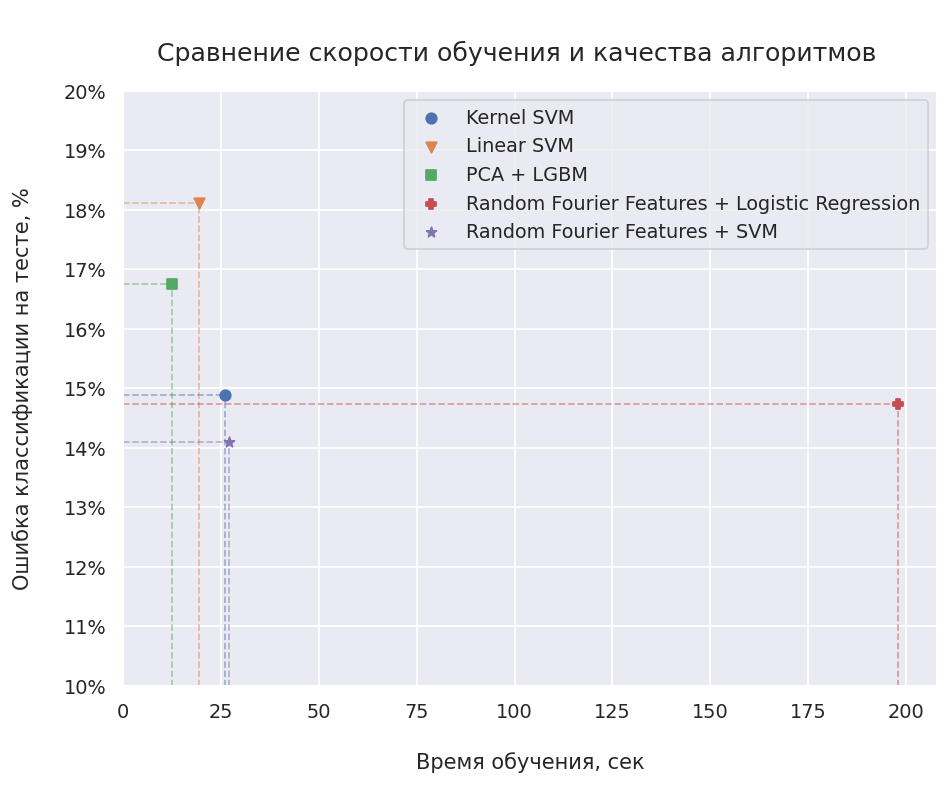

In [16]:
adjust_plot((2.28, 2.28), dpi=1.75)

fig, ax = plt.subplots()
fig.suptitle("\nСравнение скорости обучения и качества алгоритмов")
compare_time_vs_error(
    ax, part1_names,
    train_time, eval_error,
    'Время обучения', 'Ошибка классификации на тесте'
)
ax.legend();

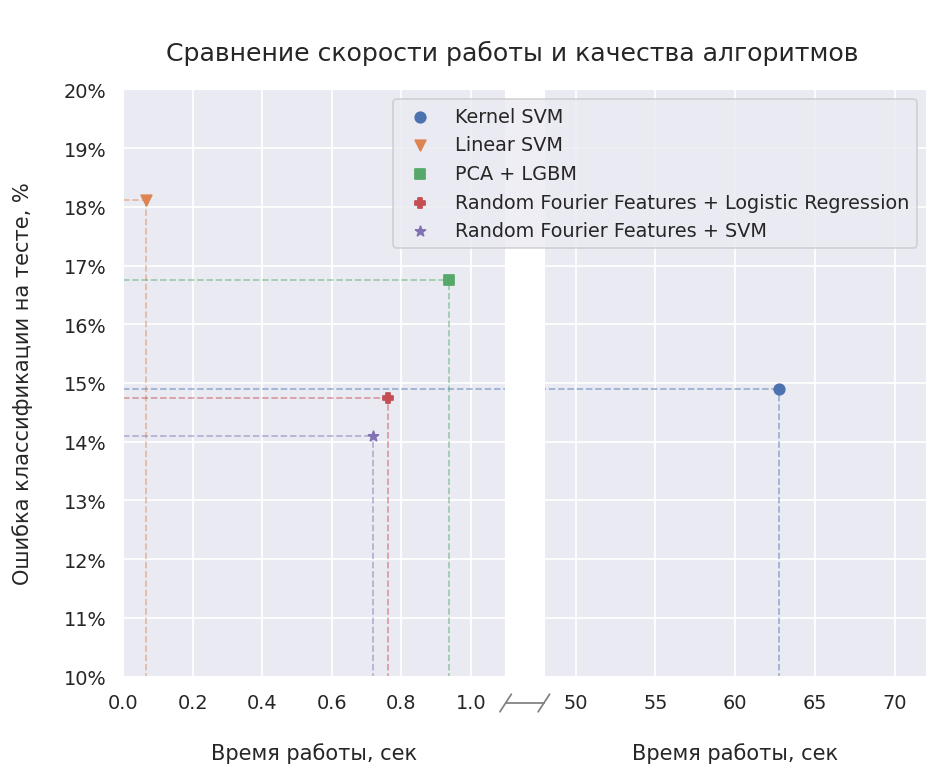

In [17]:
adjust_plot((2.25, 2.25), dpi=1.75)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle("\nСравнение скорости работы и качества алгоритмов")
compare_time_vs_error(
    ax1, part1_names,
    eval_time, eval_error,
    'Время работы', 'Ошибка классификации на тесте'
)
compare_time_vs_error(
    ax2, part1_names,
    eval_time, eval_error,
    'Время работы', 'Ошибка классификации на тесте',
    skip_ylabel=True
)

# Breax x axis
ax1.set_xlim(0, 1.1)
ax1.set_xticks(np.linspace(0, 1.0, 6))
rbf_svm_time = int(eval_time['Kernel SVM'])
center = np.round(eval_time['Kernel SVM'], decimals=-1).astype(np.int_)
ax2.set_xlim(center-12, center+12)
ax2.set_xticks(np.linspace(center-10, center+10, 5))
o = .045
d = .015
w = 0.1
kwargs = dict(transform=ax1.transAxes, color='gray', zorder=10, linewidth=1, clip_on=False)
ax1.plot((1+w,1), (-o,-o), **kwargs)
ax1.plot((1-d,1+d), (-d-o,+d-o), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d), (-d-o,+d-o), **kwargs)
fig.subplots_adjust(wspace=w)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys());

### Выводы:
 
Из графиков видно, что идея со случайными признаками работает хорошо.

- По качеству SVM с использованием RFF дает наилучший результат.
- По качеству и скорости обучения, SVM с использованием RFF, ядровой SVM и LGBM -- Парето оптимальны.
- По качеству и скорости работы, SVM с использованием RFF и линейный SVM -- Парето оптимальны.
- Логистическая регрессия очень медленно обучается.
- Ядровой SVM сильно хуже всех остальных алгоритмов по скорости работы (по понятным причинам).

__Задание 3. (2 балла)__

Проведите эксперименты **(1.5 балла)**, после которых вы сможете ответить на следующие вопросы **(0.5 балла)**:
1. Помогает ли предварительное понижение размерности с помощью PCA? 
2. Как зависит итоговое качество от n_features? Выходит ли оно на плато при росте n_features?
3. Важно ли, какую модель обучать — логистическую регрессию или SVM?

**Замечания:**
* В п.2 необходимо перебрать хотя бы 30 значений признаков по разумной сетке, затрагивающей значение в 3000 признаков (или максимальное из того, что позволяет ваш компьтер за разумное время). **За меньшее число признаков и меньшее максимальное значение будут сниматься баллы**
* В п.2 используйте логистическую регрессию
* В п.2 отобразите качества (accuracy_score) на обучении и на тесте в виде графиков на одном полотне. **За отсутствие будут сниматься баллы**
* Везде делайте замеры по времени и результаты включайте в выводы. **За отсутствие будут сниматься баллы**

In [18]:
# случайные признаки без PCA + линейный SVM
timed_train_eval(
    'Random Fourier Features + Logistic Regression (without PCA)',
    RFFPipeline(classifier='logreg', use_PCA=False)
)

Fitting RFF done in 7.67s
Fitting StandardScaler done in 0.11s
Fitting Classifier done in 154.88s
Transforming RFF done in 4.11s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.10s
Transforming RFF done in 24.66s
Transforming StandardScaler done in 0.18s
Evaluating classifier done in 0.60s


In [19]:
# случайные признаки без PCA + линейный SVM
timed_train_eval(
    'Random Fourier Features + SVM (without PCA)',
    RFFPipeline(classifier='svm', use_PCA=False)
)

Fitting RFF done in 7.63s
Fitting StandardScaler done in 0.11s
Fitting Classifier done in 13.03s
Transforming RFF done in 4.12s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.06s
Transforming RFF done in 24.70s
Transforming StandardScaler done in 0.18s
Evaluating classifier done in 0.35s


In [20]:
n_features_range = list(np.logspace(np.log10(30), np.log10(3000), 29).round().astype(np.int_))

In [21]:
for n_features in n_features_range:
    print(f"Running {n_features=}")
    # случайные признаки без PCA + линейный SVM
    timed_train_eval(
        f'Random Fourier Features + Logistic Regression ({n_features} features)',
        RFFPipeline(classifier='logreg', n_features=n_features)
    )

Running n_features=30
Fitting PCA done in 8.08s
Fitting RFF done in 0.31s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.23s
Transforming PCA done in 0.22s
Transforming RFF done in 0.01s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.00s
Transforming PCA done in 1.30s
Transforming RFF done in 0.07s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.01s
Running n_features=35
Fitting PCA done in 8.09s
Fitting RFF done in 0.31s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.50s
Transforming PCA done in 0.22s
Transforming RFF done in 0.02s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.00s
Transforming PCA done in 1.30s
Transforming RFF done in 0.10s
Transforming StandardScaler done in 0.01s
Evaluating classifier done in 0.02s
Running n_features=42
Fitting PCA done in 8.10s
Fitting RFF done in 0.31s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.55s
Transfor

Transforming PCA done in 0.22s
Transforming RFF done in 0.28s
Transforming StandardScaler done in 0.02s
Evaluating classifier done in 0.07s
Transforming PCA done in 1.31s
Transforming RFF done in 1.67s
Transforming StandardScaler done in 0.13s
Evaluating classifier done in 0.41s
Running n_features=805
Fitting PCA done in 8.18s
Fitting RFF done in 0.65s
Fitting StandardScaler done in 0.09s
Fitting Classifier done in 81.30s
Transforming PCA done in 0.22s
Transforming RFF done in 0.33s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.08s
Transforming PCA done in 1.30s
Transforming RFF done in 1.96s
Transforming StandardScaler done in 0.15s
Evaluating classifier done in 0.49s
Running n_features=949
Fitting PCA done in 8.20s
Fitting RFF done in 0.68s
Fitting StandardScaler done in 0.11s
Fitting Classifier done in 156.36s
Transforming PCA done in 0.22s
Transforming RFF done in 0.39s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.10s
Transfo

In [22]:
for n_features in n_features_range:
    print(f"Running {n_features=}")
    # случайные признаки без PCA + линейный SVM
    timed_train_eval(
        f'Random Fourier Features + SVM ({n_features} features)',
        RFFPipeline(classifier='svm', n_features=n_features)
    )

Running n_features=30
Fitting PCA done in 8.16s
Fitting RFF done in 0.30s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.13s
Transforming PCA done in 0.22s
Transforming RFF done in 0.01s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.00s
Transforming PCA done in 1.30s
Transforming RFF done in 0.07s
Transforming StandardScaler done in 0.01s
Evaluating classifier done in 0.01s
Running n_features=35
Fitting PCA done in 8.17s
Fitting RFF done in 0.31s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.13s
Transforming PCA done in 0.22s
Transforming RFF done in 0.02s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.00s
Transforming PCA done in 1.31s
Transforming RFF done in 0.09s
Transforming StandardScaler done in 0.01s
Evaluating classifier done in 0.02s
Running n_features=42
Fitting PCA done in 8.19s
Fitting RFF done in 0.31s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.14s
Transfor

Transforming PCA done in 0.22s
Transforming RFF done in 0.28s
Transforming StandardScaler done in 0.02s
Evaluating classifier done in 0.04s
Transforming PCA done in 1.31s
Transforming RFF done in 1.67s
Transforming StandardScaler done in 0.12s
Evaluating classifier done in 0.24s
Running n_features=805
Fitting PCA done in 8.09s
Fitting RFF done in 0.62s
Fitting StandardScaler done in 0.09s
Fitting Classifier done in 12.55s
Transforming PCA done in 0.22s
Transforming RFF done in 0.33s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.05s
Transforming PCA done in 1.31s
Transforming RFF done in 1.96s
Transforming StandardScaler done in 0.15s
Evaluating classifier done in 0.29s
Running n_features=949
Fitting PCA done in 8.11s
Fitting RFF done in 0.70s
Fitting StandardScaler done in 0.11s
Fitting Classifier done in 17.35s
Transforming PCA done in 0.22s
Transforming RFF done in 0.39s
Transforming StandardScaler done in 0.03s
Evaluating classifier done in 0.06s
Transfor

In [23]:
# Add default results for n_features=1000
bases = [f'Random Fourier Features + {d}' for d in ['Logistic Regression', 'SVM']]
for s in [train_time, eval_time, train_eval_error, eval_error]:
    for c in bases:
        s[c + ' (1000 features)'] = s[c]

In [24]:
n_features_range.append(1000)
n_features_range = sorted(set(n_features_range))

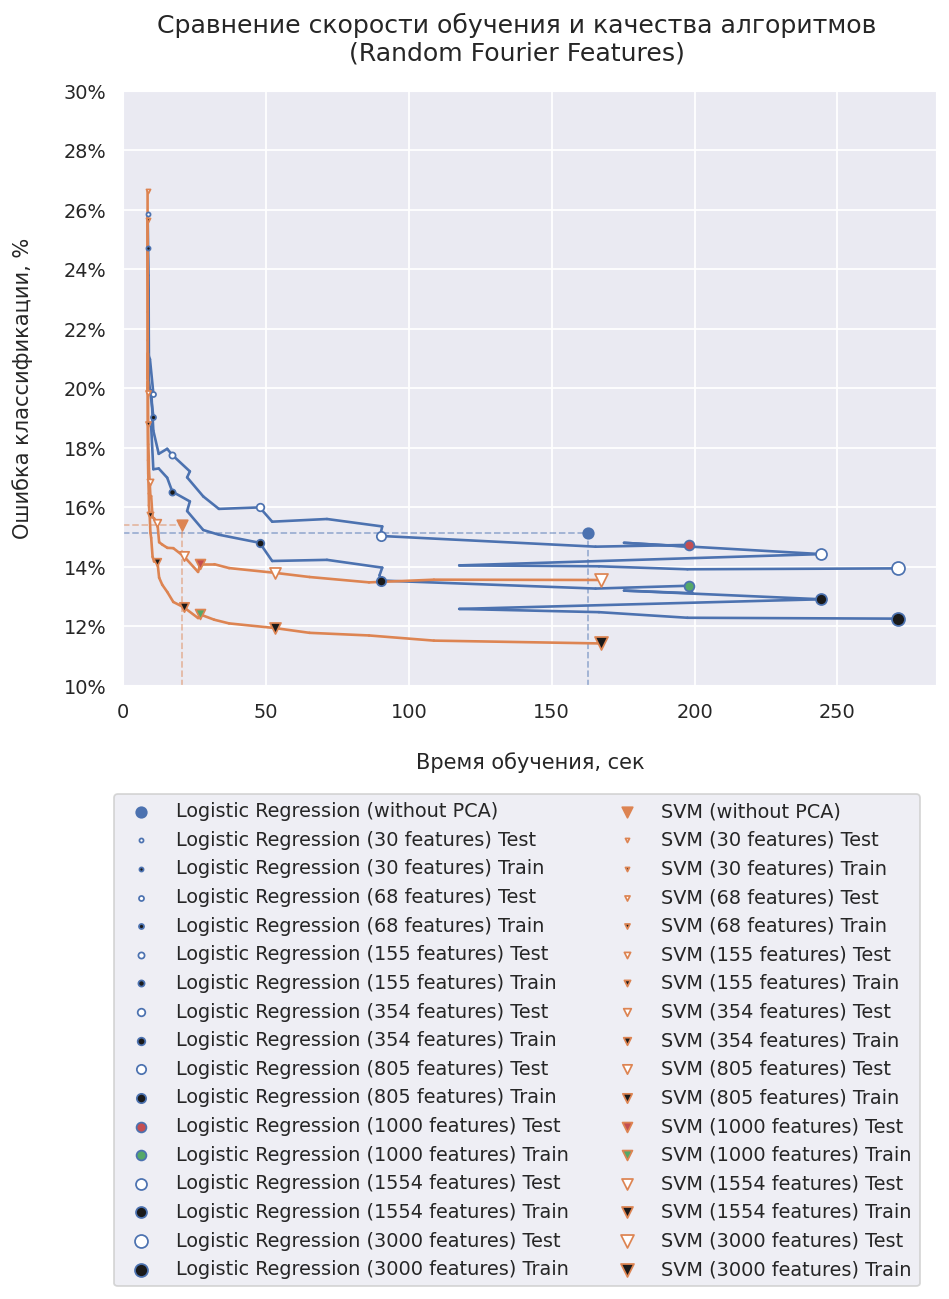

In [25]:
adjust_plot((2.28, 2.28), dpi=1.75)

fig, ax = plt.subplots()
fig.suptitle("Сравнение скорости обучения и качества алгоритмов\n(Random Fourier Features)")
ext = ' (without PCA)'
f_names = [f' ({n} features)' for n in n_features_range]
sizes = [np.sqrt(s) for s in n_features_range]
rff_prefix = 'Random Fourier Features + '
point_idxs = sorted(set(list(range(0, len(n_features_range), 5)) + [n_features_range.index(1000), len(n_features_range) - 1]))
for idx, name in enumerate(bases):
    m = default_markers[idx]
    c = f'C{idx}'
    single_time_vs_error(ax, name.replace(rff_prefix, '') + ext, train_time[name + ext], eval_error[name + ext], marker=m, color=c)
    for pidx in point_idxs:
        f_name, size = f_names[pidx], sizes[pidx]
        f_name = name + f_name
        single_time_vs_error(
            ax, f_name.replace(rff_prefix, '') + ' Test',
            train_time[f_name], eval_error[f_name],
            marker=m, color=c, s=size, draw_lines=False, fill='r' if pidx == n_features_range.index(1000) else 'w'
        )
        single_time_vs_error(
            ax, f_name.replace(rff_prefix, '') + ' Train',
            train_time[f_name], train_eval_error[f_name],
            marker=m, color=c, s=size, draw_lines=False, fill='g' if pidx == n_features_range.index(1000) else 'k'
        )

    for f_name_1, f_name_2 in zip(f_names[1:], f_names[:-1]):
        f_name_1 = name + f_name_1
        f_name_2 = name + f_name_2
        plt.plot((train_time[f_name_1], train_time[f_name_2]), (eval_error[f_name_1], eval_error[f_name_2]), color=c, zorder=2)
        plt.plot((train_time[f_name_1], train_time[f_name_2]), (train_eval_error[f_name_1], train_eval_error[f_name_2]), color=c, zorder=2)

ymin, *_, ymax = sorted(eval_error[n + e] for n in bases for e in [ext] + f_names)
setup_time_vs_error(ax, ymin, ymax, 'Время обучения', 'Ошибка классификации')
fig.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, 0));

### Выводы:

1. Помогает ли предварительное понижение размерности с помощью PCA?

Да, помогает, но не очень сильно. 

2. Как зависит итоговое качество от n_features? Выходит ли оно на плато при росте n_features?

Чем выше n_features, тем выше качество. Очевидно, это связано с тем, что аппроксимация ядра становится более точной при устремлении количества фич к $+\infty$. Качество явно стремится к какому-то пределу и уже больше 3000 фич становится не очень разумно использовать.

3. Важно ли, какую модель обучать — логистическую регрессию или SVM?

Да, нужно обучать SVM, он быстрее учится и чуть лучше работает. :^)
Если серьезно, то я подозреваю, что тут разница между линейным SVM и логистической регрессией во многом завязана на конкретные значения параметра `C`, выбор `solver`а и количество итераций, но это не точно.

P.S.
>  В п.2 отобразите качества (accuracy_score) на обучении и на тесте в виде графиков на одном полотне. **За отсутствие будут сниматься баллы**

Ошибка классификации == `1 - accuracy`.
Я не стал отдельно включать тот же график, но перевернутый, не снимайте за это баллы, пожалуйста.

### Бонус

__Задание 4. (Максимум 2 балла)__

Многие алгоритмы машинного обучения работают лучше, если признаки данных некоррелированы. Оказывается, что для RFF существует модификация, позволяющая получать ортогональные случайные признаки (Orthogonal Random Features, ORF). Об этом методе можно прочитать в [статье](https://proceedings.neurips.cc/paper/2016/file/53adaf494dc89ef7196d73636eb2451b-Paper.pdf). Реализуйте класс для вычисления ORF по аналогии с основным заданием. Обратите внимание, что ваш класс должен уметь работать со случаем n_features > new_dim (в статье есть замечание на этот счет). Проведите эксперименты, сравнивающие RFF и ORF, сделайте выводы.

**Замечание:**
* Сравнения делайте как по времени, так и по качеству.
* Можно сравнивать качество двух методов на разном числе признаков, в таком случае очень полезным будет график зависимости качества от числа признаков

In [26]:
import scipy.stats


def ORF_samples_fun(in_features, out_features):
    if in_features < out_features:
        ws = []
        while in_features < out_features:
            ws.append(ORF_samples_fun(in_features, in_features))
            out_features -= in_features
        ws.append(ORF_samples_fun(in_features, out_features))
        return np.concatenate(ws, axis=1)

    G = np.random.randn(in_features, in_features)
    S = scipy.stats.chi(in_features).rvs(in_features)
    Q, *_ = np.linalg.qr(G)
    W = S[:, np.newaxis] * Q
    W = W[:out_features]
    return W.T

In [27]:
n_features_bonus_range = sorted(set(n_features_range[::6] + [1000] + [3000]))

In [28]:
for n_features in n_features_bonus_range:
    print(f"Running {n_features=}")
    # случайные признаки без PCA + линейный SVM
    timed_train_eval(
        f'Orthogonal Random Fourier Features + Logistic Regression ({n_features} features)',
        RFFPipeline(classifier='logreg', sample_fun=ORF_samples_fun, n_features=n_features)
    )

Running n_features=30
Fitting PCA done in 8.15s
Fitting RFF done in 0.31s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.28s
Transforming PCA done in 0.22s
Transforming RFF done in 0.01s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.00s
Transforming PCA done in 1.31s
Transforming RFF done in 0.08s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.01s
Running n_features=80
Fitting PCA done in 8.14s
Fitting RFF done in 0.33s
Fitting StandardScaler done in 0.01s
Fitting Classifier done in 2.34s
Transforming PCA done in 0.22s
Transforming RFF done in 0.03s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.01s
Transforming PCA done in 1.30s
Transforming RFF done in 0.21s
Transforming StandardScaler done in 0.01s
Evaluating classifier done in 0.04s
Running n_features=216
Fitting PCA done in 8.08s
Fitting RFF done in 0.38s
Fitting StandardScaler done in 0.02s
Fitting Classifier done in 14.07s
Transf

In [29]:
for n_features in n_features_bonus_range:
    print(f"Running {n_features=}")
    # случайные признаки без PCA + линейный SVM
    timed_train_eval(
        f'Orthogonal Random Fourier Features + SVM ({n_features} features)',
        RFFPipeline(classifier='svm', sample_fun=ORF_samples_fun, n_features=n_features)
    )

Running n_features=30
Fitting PCA done in 8.09s
Fitting RFF done in 0.31s
Fitting StandardScaler done in 0.00s
Fitting Classifier done in 0.12s
Transforming PCA done in 0.22s
Transforming RFF done in 0.01s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.00s
Transforming PCA done in 1.31s
Transforming RFF done in 0.08s
Transforming StandardScaler done in 0.01s
Evaluating classifier done in 0.01s
Running n_features=80
Fitting PCA done in 8.10s
Fitting RFF done in 0.35s
Fitting StandardScaler done in 0.01s
Fitting Classifier done in 0.34s
Transforming PCA done in 0.22s
Transforming RFF done in 0.03s
Transforming StandardScaler done in 0.00s
Evaluating classifier done in 0.01s
Transforming PCA done in 1.31s
Transforming RFF done in 0.21s
Transforming StandardScaler done in 0.01s
Evaluating classifier done in 0.03s
Running n_features=216
Fitting PCA done in 8.08s
Fitting RFF done in 0.39s
Fitting StandardScaler done in 0.02s
Fitting Classifier done in 1.42s
Transfo

In [30]:
bonus1_bases = sorted(e + b for b in bases for e in ['', 'Orthogonal '])

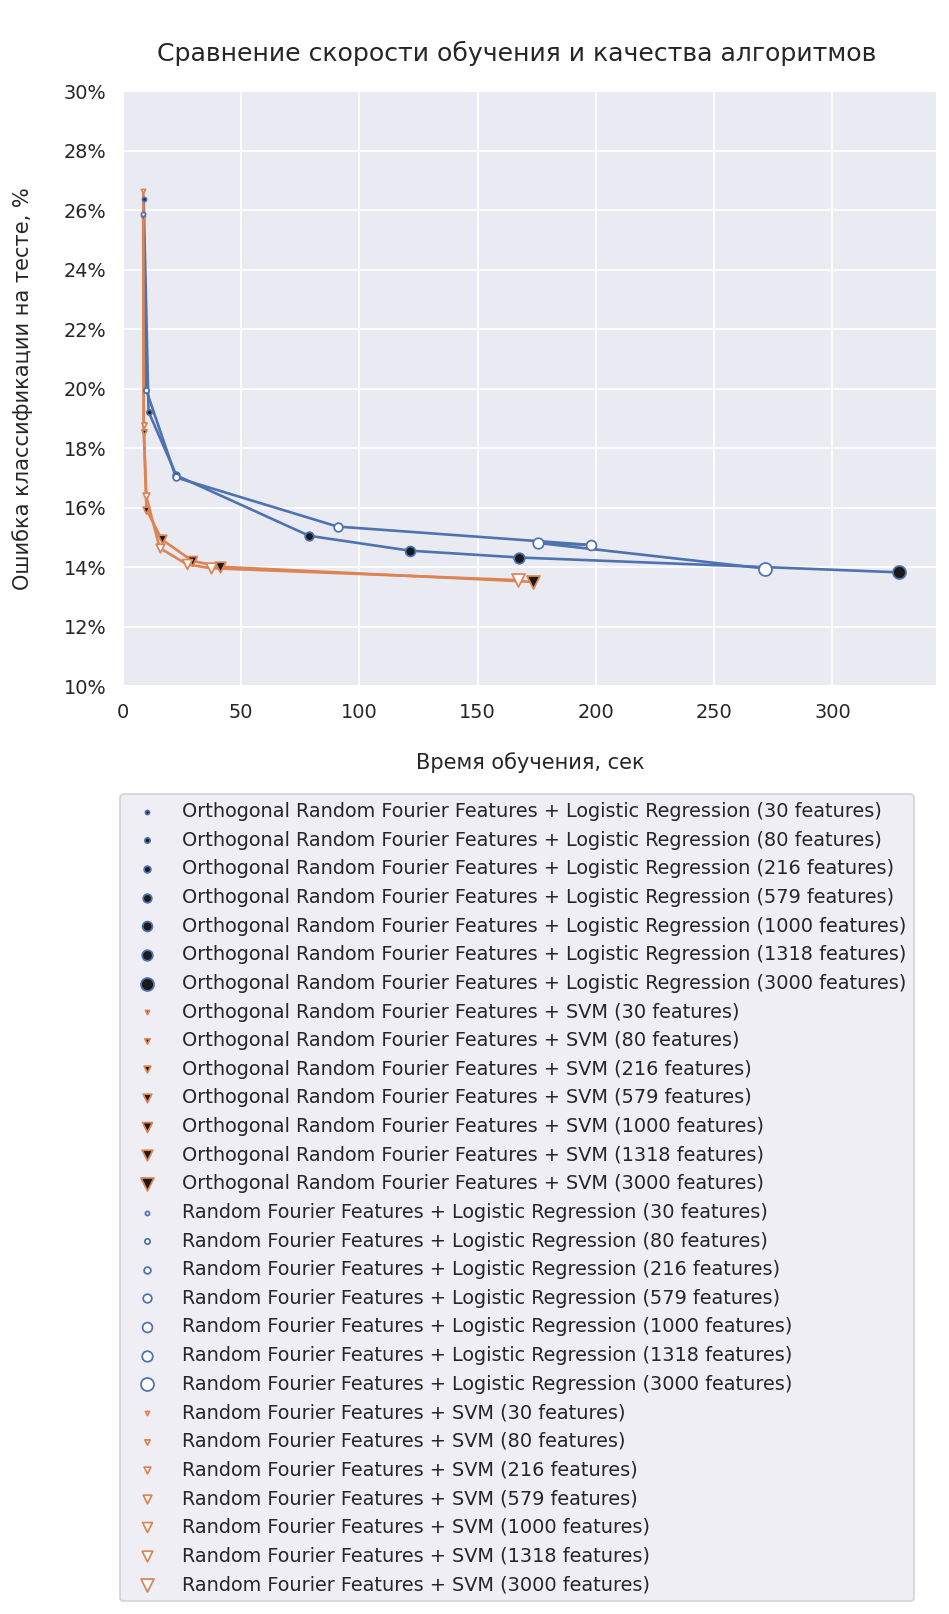

In [31]:
adjust_plot((2.28, 2.28), dpi=1.75)

fig, ax = plt.subplots()
fig.suptitle("\nСравнение скорости обучения и качества алгоритмов")
f_names = [f' ({n} features)' for n in n_features_bonus_range]
sizes = [np.sqrt(s) for s in n_features_bonus_range]
point_idxs = list(range(0, len(n_features_bonus_range)))

for idx, name in enumerate(bonus1_bases):
    m = default_markers[idx % 2]
    c = f'C{idx % 2}'
    for pidx in point_idxs:
        f_name, size = f_names[pidx], sizes[pidx]
        f_name = name + f_name
        single_time_vs_error(
            ax, f_name,
            train_time[f_name], eval_error[f_name],
            marker=m, color=c, s=size, draw_lines=False, fill='k' if 'Orthogonal' in name else 'w'
        )

    for f_name_1, f_name_2 in zip(f_names[1:], f_names[:-1]):
        f_name_1 = name + f_name_1
        f_name_2 = name + f_name_2
        plt.plot((train_time[f_name_1], train_time[f_name_2]), (eval_error[f_name_1], eval_error[f_name_2]), color=c, zorder=2)

ymin, *_, ymax = sorted(eval_error[n + e] for n in bases for e in f_names)
setup_time_vs_error(ax, ymin, ymax, 'Время обучения', 'Ошибка классификации на тесте')
fig.legend(ncol=1, loc='upper center', bbox_to_anchor=(0.5, 0));

### Выводы:

Orthogonal Random Fourier Features дает чуть лучшие результаты для логистической регрессии и чуть хуже для SVM.

__Задание 5. (Максимум 2 балла)__

Поэкспериментируйте с функциями для вычисления новых случайных признаков. Не обязательно использовать косинус от скалярного произведения — можно брать знак от него, хэш и т.д. Придумайте побольше вариантов для генерации признаков и проверьте, не получается ли с их помощью добиваться более высокого качества. Также можете попробовать другой классификатор поверх случайных признаков, сравните результаты.

**Замечание:**
* Сравнения делайте как по времени, так и по качеству.